In [2]:
import dirfile_functions as df

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
roach_path = 'roach_data/'
ancillary_path = 'xy_stage/'

In [22]:
import pygetdata as gd

In [187]:
I, Q = df.loadIQsingleChan(roach_path, 1)
d_roach = gd.dirfile(roach_path, gd.RDWR|gd.UNENCODED)
print d_roach.nframes
print I.shape
mag = np.sqrt(I**2 + Q**2)
phs = np.arctan2(Q,I)

5542745
(5542745,)


In [188]:
#def arbread(dirfile,):
d_anc = gd.dirfile(ancillary_path, gd.RDWR|gd.UNENCODED)
vectors = d_anc.field_list()
x_stage = d_anc.getdata('x_stage', gd.FLOAT32)#, num_frames = d.nframes)
y_stage = d_anc.getdata('y_stage', gd.FLOAT32)

In [189]:
print d_anc.nframes
print len(x_stage)*488./5.
print x_stage.shape
print float(len(I))/len(x_stage)
print 488./5.2

5542745
5561736.0
(56985,)
97.2667368606
93.8461538462


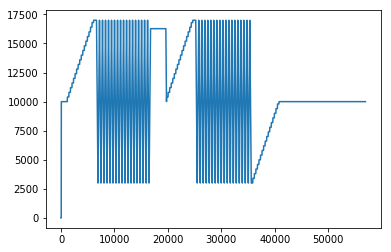

In [190]:
%matplotlib inline
plt.plot(x_stage)
plt.show()

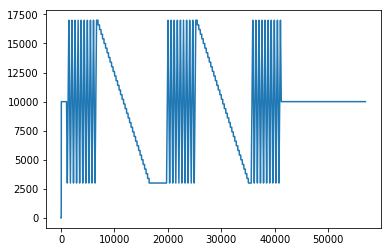

In [191]:
plt.plot(y_stage)
plt.show()

<IPython.core.display.Javascript object>


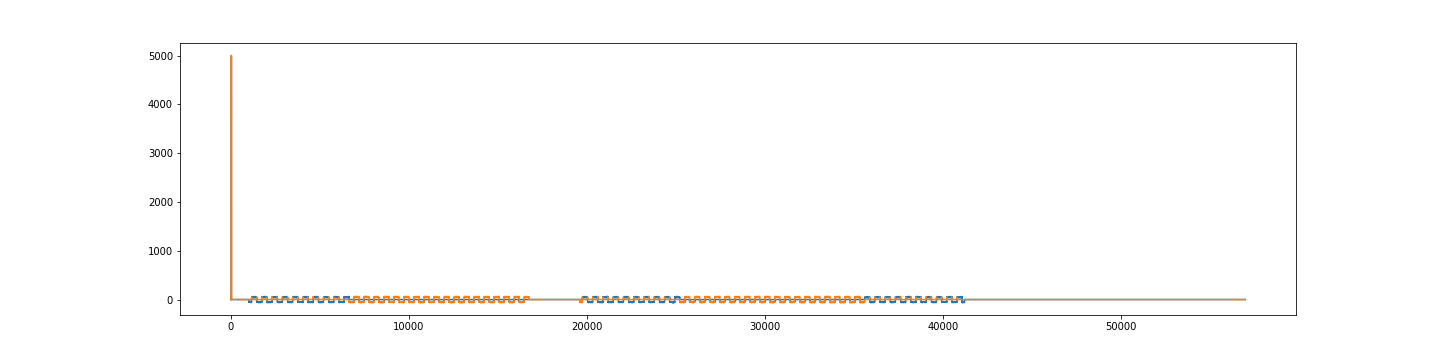

In [192]:
%matplotlib notebook
plt.figure(figsize=(20,5))
plt.plot(np.gradient(y_stage))
plt.plot(np.gradient(x_stage))
plt.show()

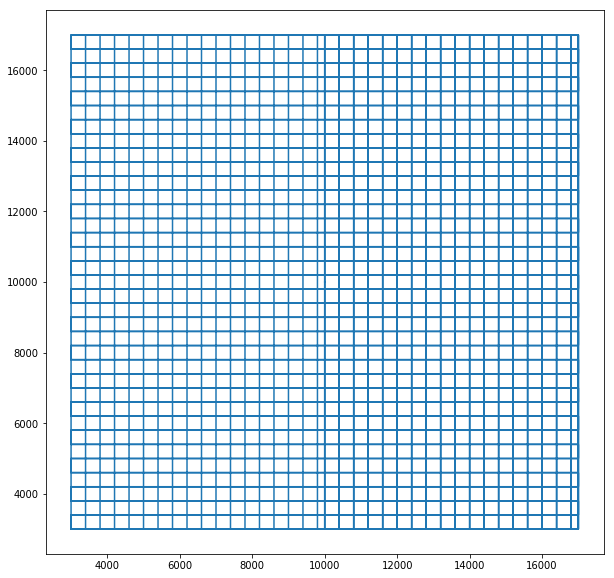

In [96]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.plot(x_stage[x_stage > 0],y_stage[x_stage > 0])

<IPython.core.display.Javascript object>


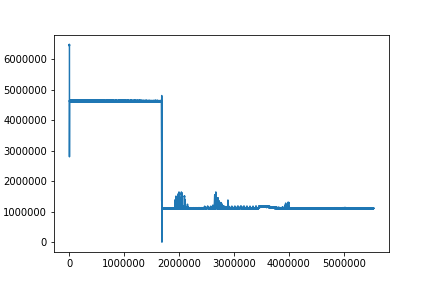

In [193]:
%matplotlib notebook
plt.plot(np.sqrt(I**2 + Q**2))
plt.show()

<IPython.core.display.Javascript object>


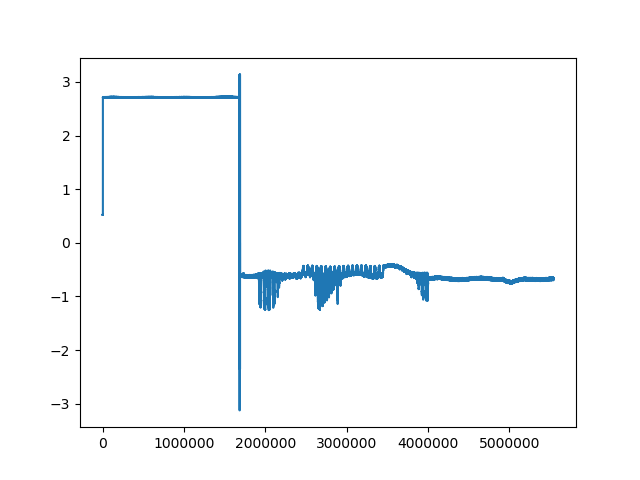

In [75]:
%matplotlib notebook
plt.plot(np.arctan2(Q,I))
plt.show()

<IPython.core.display.Javascript object>


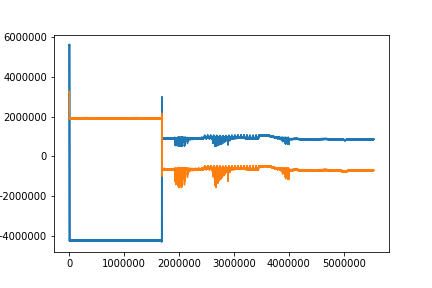

In [194]:
%matplotlib notebook
plt.plot(I)
plt.plot(Q)
plt.show()

In [99]:
t488 = np.arange(len(Q))/488.
t5 = np.arange(len(x_stage))/5.

<IPython.core.display.Javascript object>


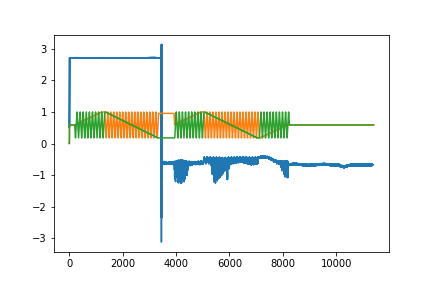

In [195]:
%matplotlib notebook
plt.plot(t488,phs)
plt.plot(t5,x_stage/x_stage.max())
plt.plot(t5,y_stage/y_stage.max())
plt.show()

In [173]:
tmin = 5000
tmax = 7100
whgood5 = np.logical_and(t5 > tmin, t5 < tmax)
whgood488 = np.logical_and(t488 > tmin+1, t488 < tmax-1)

<IPython.core.display.Javascript object>


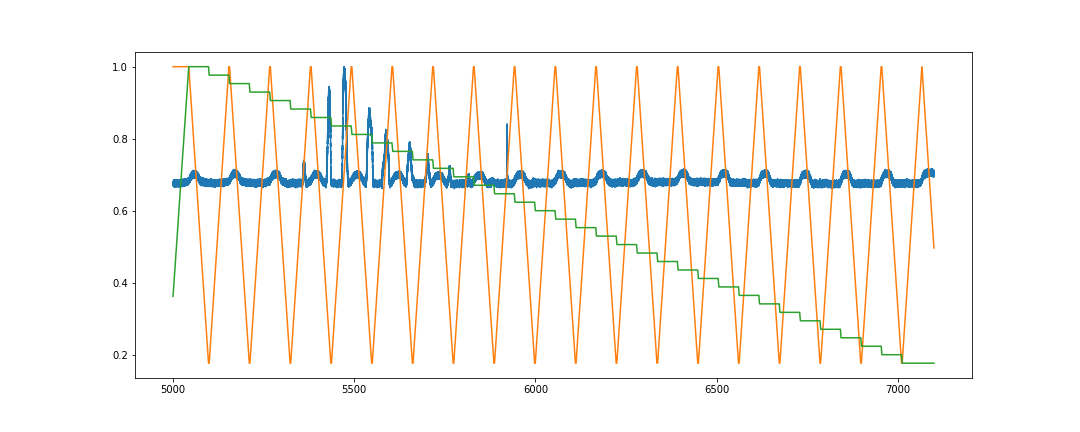

In [212]:
%matplotlib notebook
plt.figure(figsize=(15,6))
plt.plot(t488[whgood488],mag[whgood488]/m.max())
plt.plot(t5[whgood5],x_stage[whgood5]/x_stage.max())
plt.plot(t5[whgood5],y_stage[whgood5]/y_stage.max())
plt.show()

In [117]:
from scipy.interpolate import interp1d

In [197]:
# It really looksl like there was a stage scan where no data came through
t_s5 = t5[whgood5]
x_s = interp1d(t_s5, x_stage[whgood5], kind='nearest')
y_s = interp1d(t_s5, y_stage[whgood5], kind='nearest')

In [198]:
# This is now _the_ time base
t = t488[whgood488]
m = mag[whgood488]
p = mag[whgood488]

In [199]:
print t.min()
print t.max()
print t_s5.min()
print t_s5.max()

5001.002049180328
7098.997950819672
5000.2
7099.8


<IPython.core.display.Javascript object>


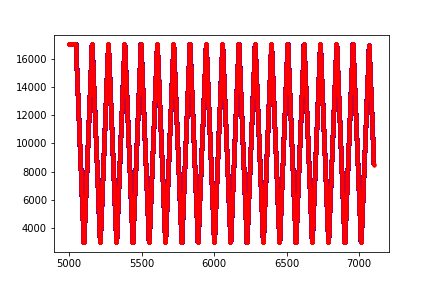

In [200]:
%matplotlib notebook
plt.plot(t,x_s(t),'b.')
plt.plot(t_s5,x_stage[whgood5],'r.')
plt.show()

<IPython.core.display.Javascript object>


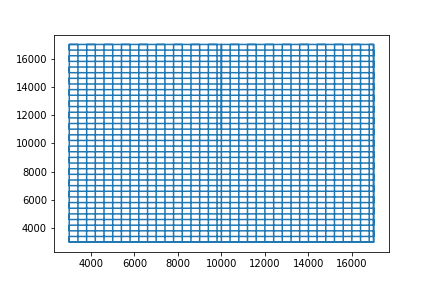

In [158]:
%matplotlib notebook
plt.plot(x_s(t),y_s(t))
plt.show()

In [201]:
# There's probably a better way to determine this based on the gradient in x,y 
# but it looks like the grid is about 250 x 250 in some units
ds = 100.
xpix = np.arange(x_s(t).min(),x_s(t).max(),ds)
ypix = np.arange(y_s(t).min(),y_s(t).max(),ds)

In [202]:
from scipy.interpolate import griddata

In [203]:
#%%time
#zi = griddata((x_s(t), y_s(t)), m, (xpix[None,:], ypix[:,None]), method='nearest')

In [204]:
#%matplotlib notebook
#plt.imshow(zi,aspect='auto')
#plt.show()

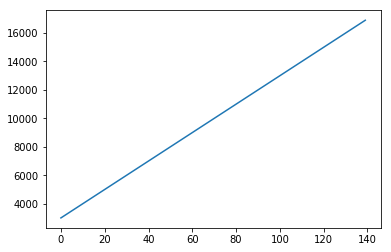

In [205]:
%matplotlib inline
plt.plot(xpix)

In [206]:
from scipy.stats import binned_statistic_2d as gridmap

In [207]:
%%time
ret = gridmap(x_s(t), y_s(t), m, 'mean',bins=30)#, bins=140)

CPU times: user 201 ms, sys: 20 ms, total: 221 ms
Wall time: 220 ms


<IPython.core.display.Javascript object>


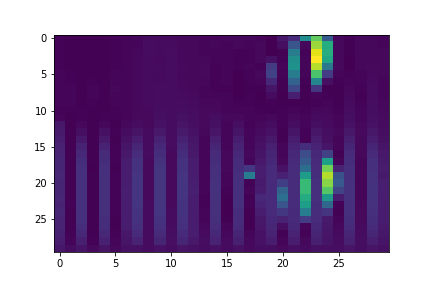

In [208]:
%matplotlib notebook
plt.imshow(ret.statistic,aspect='auto')
plt.show()

<IPython.core.display.Javascript object>


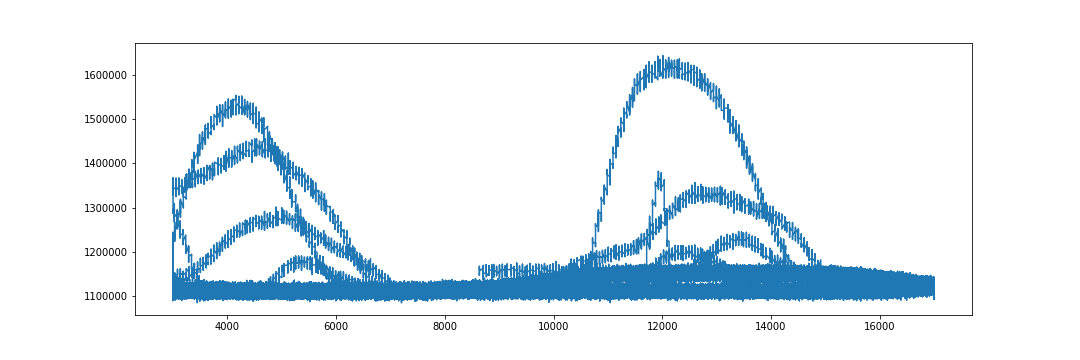

In [211]:
%matplotlib notebook
plt.figure(figsize=(15,5))
plt.plot(x_s(t),m)
plt.show()